https://www.kaggle.com/datasets/michaelbryantds/carnivorous-diets

https://trello.com/b/H1LsB1I6/iron-hack-project-w4-data-visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager
import seaborn as sns
import numpy as np
import squarify #For tree map with matplot
import plotly.express as px

In [ ]:
data = pd.read_csv("data/carnivorous_diet.csv", encoding = "ISO-8859-1")
metadata_df = pd.read_excel("data/metadata.xlsx")

In [ ]:
species_list = data["commonNameCarni"].value_counts()

### Dataset presentation
Data on the diet compositions for 103 species of terrestrial, carnivorous mammals. The data is comming from (mostly) peer-reviewed scientific papers. Each of its 29,000+ rows represents a “diet record,” describing a component of the species’ consumption, for a particular population, geography, and study.
<br/>
This dataset was originaly published with a scientific article in "Global ecology and biogeography" peer-review journal (https://doi.org/10.1111/geb.13296).




### Plots ideas

- Nombre d'enregistrement pour chaque espèces : done
- Repartition des espèces en ordes et famille : treemaps,  sunburst charts (https://towardsdatascience.com/visualize-hierarchical-data-using-plotly-and-datapane-7e5abe2686e1)
- Le nombre de nourritues (foodtype) différentes mangé pour chaque espèce
- Reproduire celui les figures (a) et (b) de l'article.
- La répartition des régimes alimentaires des mammifères carnivores en pourcentage
- Evoloution des régimes alimentaires dans le temps 

### Number of records per species

In [ ]:
fig = plt.figure(figsize=(20,15))
p = sns.histplot(data["commonNameCarni"]) #histplot() n'est pas le bon choix car ne permet pas d'ordonnée par le nombre de "Diet records" (pas d'argument "order") -> countplot(), barplot()

plt.xticks(rotation=90)
p.set(xlabel="Common name of carni", ylabel = "Number of diet records", title="Number of records per species")
# p.tick_params(length=0)                               # remove tick liens

#Remove box arount plot 
p.spines['top'].set_visible(False) #p est un subplot de fig
p.spines['bottom'].set_visible(False) #p est un subplot de fig
p.spines['left'].set_visible(False) #p est un subplot de fig
p.spines['right'].set_visible(False)

In [ ]:
fig = plt.figure(figsize=(17,12))
p = sns.countplot(data=data, x = "commonNameCarni", order = data["commonNameCarni"].value_counts().index, palette=['#33C7FF',"#3F8BFF"])

p.set(xlabel="Common name of carni", ylabel = "Number of diet records", title="Number of records per species")
#Remove box arount plot 
p.spines['top'].set_visible(False) #p est un subplot de fig
p.spines['bottom'].set_visible(False) #p est un subplot de fig
p.spines['left'].set_visible(False) #p est un subplot de fig
p.spines['right'].set_visible(False)
plt.xticks(rotation=90)
p.tick_params(axis="x", length = 0) # Remove xticks

#### Pas claire, il faut trouver un moyen d'afficher les donnée en résumant d'avantage les valeurs -> grouper : combien d'espèce ont entre tant et tant de records ?<br/>
https://stackoverflow.com/questions/73214214/how-can-i-create-a-bar-chart-with-ranges-of-values

In [ ]:
# 1) Creat a dataset with range values

diet_record_num = data["commonNameCarni"].value_counts()
diet_record_num # -> compter combien sont dans quelle tranche de valeurs

cut = pd.cut(diet_record_num,[0,100,500,1000,4500], labels=["0-100","100-500","500-1000","1000-4500"])
cut = cut.to_frame()
cut["Names"] = cut.index

cut

In [ ]:
fig = plt.figure()
ax = sns.countplot(cut, x = "count", palette=['#1852AA',"#D81515"])

ax.set(xlabel="Number of diet records", ylabel = "Number of species", title="Number of species for each \n range of number of diet records")
#Remove box arount plot 
ax.spines['top'].set_visible(False) #p est un subplot de fig
ax.spines['bottom'].set_visible(False) #p est un subplot de fig
ax.spines['left'].set_visible(False) #p est un subplot de fig
ax.spines['right'].set_visible(False)
ax.tick_params(length = 0) # Remove xticks
ax.set_axisbelow(True)
ax.grid(axis = 'y')

my_color = '#424242'
mpl.rcParams['text.color'] = my_color
mpl.rcParams['axes.labelcolor'] = my_color
mpl.rcParams['xtick.color'] = my_color
mpl.rcParams['ytick.color'] = my_color

### Repartition of species in order, family

In [92]:
data_plot = data[["orderCarni","familyCarni","scientificNameCarni"]]
data_plot['orderCarni_count'] = data_plot.groupby(['orderCarni'])['orderCarni'].transform('count') 
data_plot['familyCarni_count'] = data_plot.groupby(['orderCarni', 'familyCarni'])['familyCarni'].transform('count')
data_plot['scientificNameCarni_count'] = data_plot.groupby(['orderCarni', 'familyCarni', 'scientificNameCarni'])['scientificNameCarni'].transform('count') #Super interessant !
data_plot = data_plot.drop_duplicates(subset="scientificNameCarni") # On a bien 103 ligne

/var/folders/wm/d5dlldtd761c3pdx78hpgpg40000gn/T/ipykernel_12309/242190910.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wm/d5dlldtd761c3pdx78hpgpg40000gn/T/ipykernel_12309/242190910.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wm/d5dlldtd761c3pdx78hpgpg40000gn/T/ipykernel_12309/242190910.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

<Axes: >

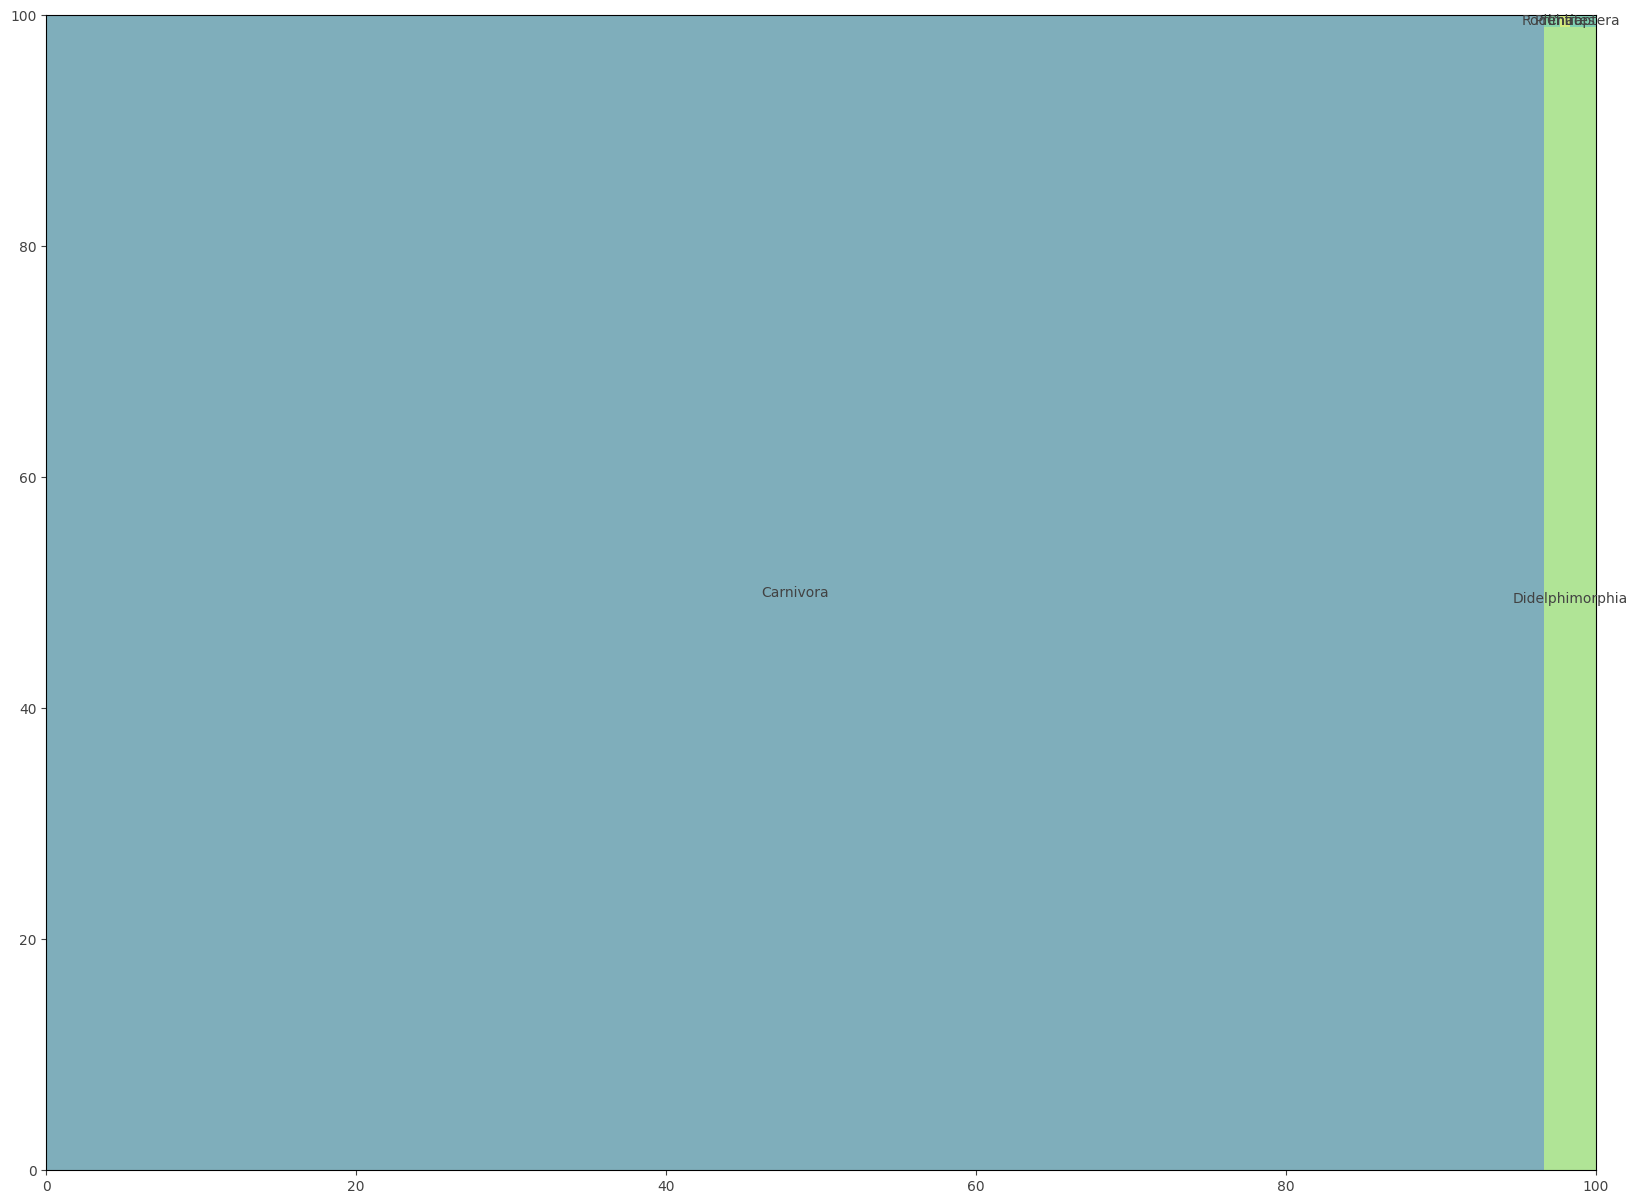

In [76]:
list_of_orders = list(data_plot["orderCarni"].unique())
num_spaces_per_order = list(data_plot["orderCarni_count"].unique())

fig = plt.figure(figsize=(20,15))
squarify.plot(sizes=num_spaces_per_order, label=list_of_orders, alpha = 0.6)

For Treemap, matplotlib is very limitated (for multilevel treemap and label placement), it's preferable to use ploty (https://plotly.com/python/treemaps/)

In [93]:
fig = px.treemap(data_plot, path=[px.Constant("all"), 'orderCarni','familyCarni'], values='familyCarni_count')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [85]:
fig = px.treemap(data_plot, path=[px.Constant("all"), 'orderCarni', 'familyCarni', 'scientificNameCarni'], values='scientificNameCarni_count')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [87]:
fig = px.treemap(data_plot, path=[px.Constant("all"), 'familyCarni', 'scientificNameCarni'], values='scientificNameCarni_count')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Mapping libraries

**Geopandas** (Pandas extended to support geographical data and algorithms -> NOT a visualization librairy)

Critère de choix : besoin d'interactovité ou pas ? 

Based on matplotlib (https://matplotlib.org/mpl-third-party/) : 
- **Cartopy**
- **EOmaps** (A library to create interactive maps of geographical datasets)
- **Geoplot** (High-level Python geospatial plotting library based on Cartopy.)

Non based on matplotlib (plus puissante, surement trop pour notre utilisation, et pas basés sur matplotlib -> on va utiliser autre choses) : 
- **Folium** (https://geopandas.org/en/stable/gallery/plotting_with_folium.html)
- **Plotly** (https://plotly.com/python/mapbox-layers/)